In [35]:
pip install geopandas matplotlib



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\cht35\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [37]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\cht35\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
from scipy import stats
import geopandas as gpd
from geopy.geocoders import Nominatim

In [25]:
#Upload data sets
customers= pd.read_csv(r"C:\Users\cht35\OneDrive\Desktop\Data Analytics Mid Term\customer_data_cleaned.csv")
print(customers.head(4))
print("")

products= pd.read_csv(r"C:\Users\cht35\OneDrive\Desktop\Data Analytics Mid Term\product_data_cleaned.csv")
print(products.head(4))
print("")

sales= pd.read_csv(r"C:\Users\cht35\OneDrive\Desktop\Data Analytics Mid Term\sales_data_cleaned.csv")
print(sales.head(4))
print("")


   CustomerID  CustomerName      email corrected  Phone Number State and Zip  \
0           1      John Doe    johndoe@email.com  1.234568e+09     IL, 62704   
1           2    Jane Smith  janesmith@email.com           NaN     IL, 60616   
2           3           NaN    michael@email.com  1.234568e+09     NY, 10001   
3           4  Emily Browne                  NaN           NaN     CA, 94103   

  State  Zip Code  
0    IL   62704.0  
1    IL   60616.0  
2    NY   10001.0  
3    CA   94103.0  

   ProductID   ProductName     Category   Price  StockQuantity
0          1        Laptop  Electronics  999.99             20
1          2    Smartphone  Electronics  499.99             30
2          3          Desk    Furniture  199.99             15
3          4  Office Chair    Furniture   79.99             25

   SalesID  CustomerID  ProductID   SaleDate  SaleAmount
0        1           1          1  1/10/2023          50
1        2           2          2  1/11/2023          40
2        3 

In [13]:
customers.info()
print("")

products.info()
print("")

sales.info()
print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       100 non-null    int64  
 1   CustomerName     97 non-null     object 
 2   email corrected  52 non-null     object 
 3   Phone Number     60 non-null     float64
 4   State and Zip    78 non-null     object 
 5   State            79 non-null     object 
 6   Zip Code         79 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      86 non-null     int64  
 1   ProductName    84 non-null     object 
 2   Category       76 non-null     object 
 3   Price          86 non-null     float64
 4   StockQuantity  86 non-null     int64  
dtypes: fl

In [27]:
#making a new column in products for inventory value
products['InventoryValue']=products['Price']*products['StockQuantity']

In [28]:
products[['Price', 'StockQuantity','InventoryValue']].describe()

,Price,StockQuantity,InventoryValue
count,86.000000,86.000000,86.000000
mean,156.990581,19.930233,1960.491395
std,187.908883,11.999795,2641.204211
min,5.990000,3.000000,359.400000
25%,39.990000,10.000000,899.730000
50%,79.990000,18.000000,1254.930000
75%,199.990000,25.000000,2094.915000
max,999.990000,60.000000,19999.800000


In [30]:
sales['SaleAmount'].describe()

count    129.000000
mean      40.465116
std        8.183488
min       30.000000
25%       30.000000
50%       40.000000
75%       50.000000
max       50.000000
Name: SaleAmount, dtype: float64

In [62]:
sales

,SalesID,CustomerID,ProductID,SaleDate,SaleAmount
0,1,1,1,1/10/2023,50
1,2,2,2,1/11/2023,40
2,3,3,3,1/12/2023,30
3,4,1,2,1/15/2023,40
4,5,2,3,1/17/2023,30
...,...,...,...,...,...
124,143,1,1,10/13/2023,50
125,145,3,2,10/17/2023,40
126,146,1,1,10/19/2023,50
127,148,3,2,10/23/2023,40


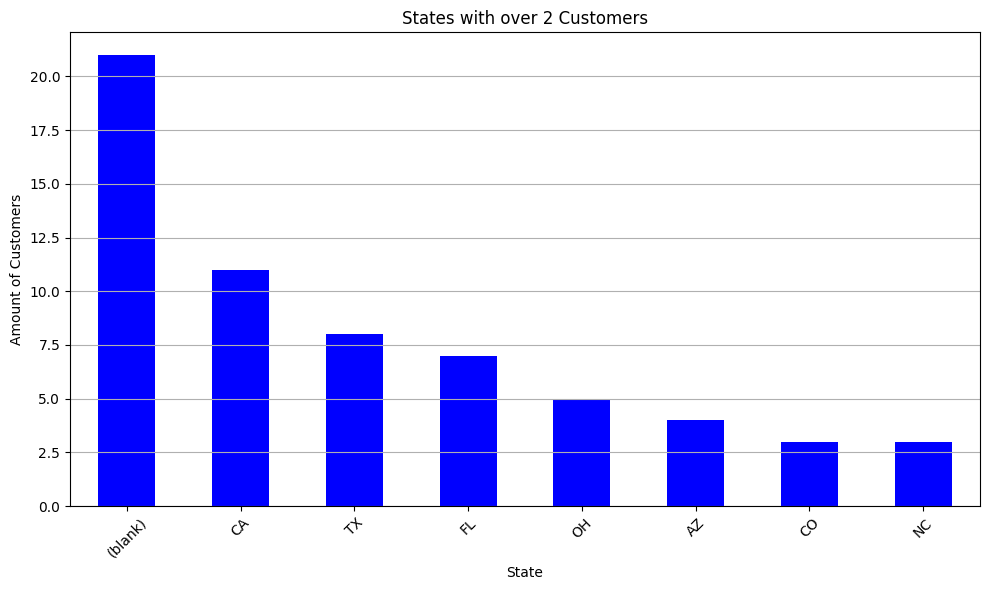

In [33]:

# Create a new table and fill null state values with "blank"
customer_blank = customers.copy()
customer_blank['State'] = customers['State'].fillna('(blank)')

# Count customers by state
state_counts = customer_blank['State'].value_counts()

# Filter for states with more than 2 customers
states_over_2 = state_counts[state_counts > 2]

# Plot the bar graph
plt.figure(figsize=(10, 6))
states_over_2.plot(kind='bar', color='blue')
plt.title("States with over 2 Customers")
plt.xlabel("State")
plt.ylabel("Amount of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [69]:
# Step 1: Replace missing values in the Category column
products['Category'] = products['Category'].fillna('(blank)')

# Step 2: Group by Category and calculate required statistics
summary_table = products.groupby('Category').agg(
    Count_of_Products=('ProductID', 'count'),
    Average_of_Price=('Price', 'mean')
).reset_index()

# Step 3: Add a Grand Total row
grand_total = pd.DataFrame({
    'Category': ['Grand Total'],
    'Count_of_Products': [summary_table['Count_of_Products'].sum()],
    'Average_of_Price': [summary_table['Average_of_Price'].mean()]
})

# Append the Grand Total row to the summary table
summary_table = pd.concat([summary_table, grand_total], ignore_index=True)

# Step 4: Format the Average of Price as a dollar value
summary_table['Average_of_Price'] = summary_table['Average_of_Price'].apply(lambda x: f"${x:.2f}")

# Rename the columns for display
summary_table.rename(columns={
    'Category': 'Product Categories',
    'Count_of_Products': 'Count of Products',
    'Average_of_Price': 'Average of Price'
}, inplace=True)

# Step 5: Sort by 'Count of Products'
summary_table = summary_table.sort_values(by='Count of Products', ascending=False, ignore_index=True)

# Display the sorted summary table
summary_table

,Product Categories,Count of Products,Average of Price
0,Grand Total,86,$150.73
1,Electronics,16,$232.49
2,Furniture,12,$178.24
3,Kitchen,11,$40.27
4,(blank),10,$106.59
5,Appliances,7,$392.85
6,Outdoor,5,$130.59
7,Home Appliances,4,$51.49
8,Home Decor,4,$43.49
9,Fashion,3,$56.66


<Axes: >

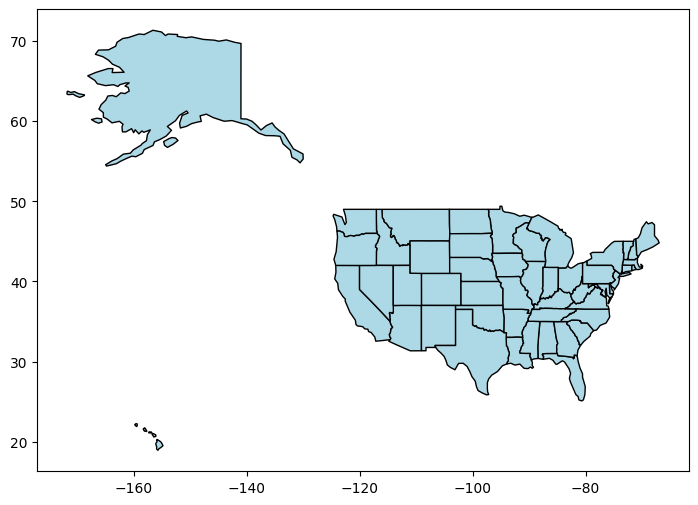

In [48]:
shapefile_path = r"C:\Users\cht35\OneDrive\Desktop\Data Analytics Mid Term\naturalearth_lowres\ne_110m_admin_1_states_provinces.shp"
# Load the shapefile
world = gpd.read_file(shapefile_path)

# Filter for U.S. data (if needed)
us_states = world[world['iso_a2'] == 'US']
us_states.plot(figsize=(10, 6), color='lightblue', edgecolor='black')

In [71]:
# Step 1: Create a pivot table for quantities grouped by CustomerID and ProductID
pivot_table = sales.pivot_table(
    index='CustomerID',  # Rows as Customer IDs
    columns='ProductID',  # Columns as Product IDs
    values='SaleAmount',  # Values to aggregate
    aggfunc='sum',  # Aggregation function (sum of SaleAmount)
    fill_value=0  # Replace NaN with 0
)

# Step 2: Rename columns to include "Product" for clarity
pivot_table.columns = [f"Product {col} Quantity" for col in pivot_table.columns]

# Step 3: Add row totals (Grand Total per Customer)
pivot_table['Grand Total'] = pivot_table.sum(axis=1)

# Step 4: Add a Grand Total row
grand_totals = pivot_table.sum(axis=0)
grand_totals.name = 'Grand Total'

# Ensure "Grand Total" row is appended
pivot_table = pd.concat([pivot_table, grand_totals.to_frame().T])

# Reset the index and rename it to "Customer ID"
pivot_table = pivot_table.reset_index()
pivot_table.rename(columns={'index': 'Customer ID'}, inplace=True)

# Display the table
pivot_table

,Customer ID,Product 1 Quantity,Product 2 Quantity,Product 3 Quantity,Grand Total
0,1,1450,600,60,2110
1,2,100,40,1110,1250
2,3,750,1080,30,1860
3,Grand Total,2300,1720,1200,5220


C:\Users\cht35\AppData\Local\Temp\ipykernel_32268\496641485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot.drop(columns=['Grand Total'], inplace=True)  # Remove the 'Grand Total' column


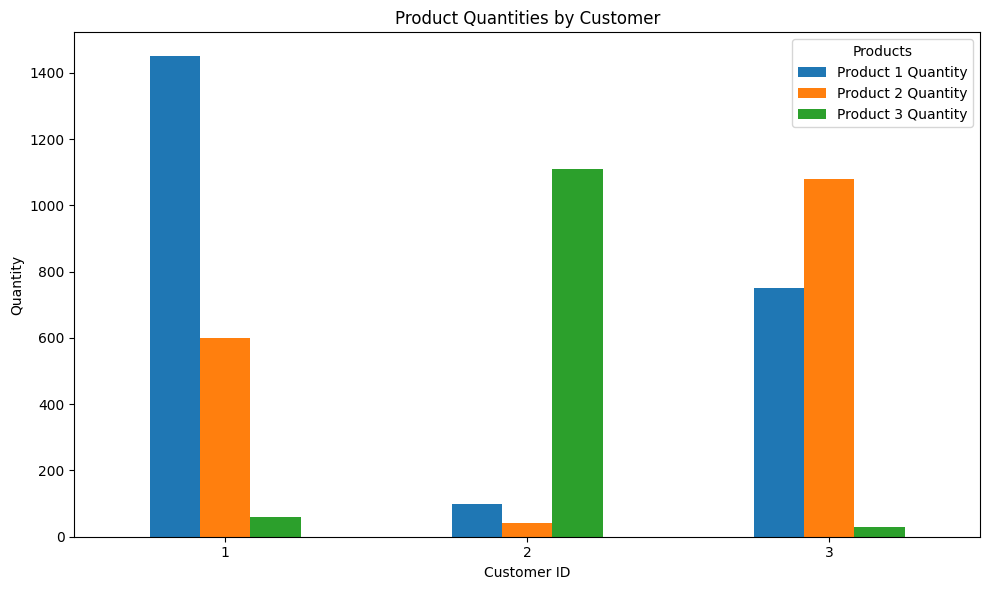

In [75]:
# Remove the "Grand Total" row before plotting
data_to_plot = pivot_table[pivot_table['Customer ID'] != 'Grand Total']

# Set "Customer ID" as the index for proper plotting
data_to_plot.set_index('Customer ID', inplace=True)

# Plot the bar graph
data_to_plot.drop(columns=['Grand Total'], inplace=True)  # Remove the 'Grand Total' column
data_to_plot.plot(kind='bar', figsize=(10, 6))
plt.title("Product Quantities by Customer")
plt.xlabel("Customer ID")
plt.ylabel("Quantity")
plt.xticks(rotation=0)
plt.legend(title="Products")
plt.tight_layout()
plt.show()

In [77]:
customers.head(3)

,CustomerID,CustomerName,email corrected,Phone Number,State and Zip,State,Zip Code
0,1,John Doe,johndoe@email.com,1.234568e+09,"IL, 62704",IL,62704.0
1,2,Jane Smith,janesmith@email.com,NaN,"IL, 60616",IL,60616.0
2,3,NaN,michael@email.com,1.234568e+09,"NY, 10001",NY,10001.0


In [78]:
sales.head(3)

,SalesID,CustomerID,ProductID,SaleDate,SaleAmount
0,1,1,1,1/10/2023,50
1,2,2,2,1/11/2023,40
2,3,3,3,1/12/2023,30


In [79]:
products.head(3)

,ProductID,ProductName,Category,Price,StockQuantity,InventoryValue
0,1,Laptop,Electronics,999.99,20,19999.80
1,2,Smartphone,Electronics,499.99,30,14999.70
2,3,Desk,Furniture,199.99,15,2999.85
